## Goal
* issues : overfitting, underfitting, model selection, numerical stability and parameter initialization
* solutions : regularization techniques such as weight decay and dropout

## 4.1 Multilayer Perceptrons

4.1.1 Hidden Layers
* linearity in affine transformation is a *strong* assumption.(may go wrong)
* using logarithm : While monotonic, this relationship likely is not linearly associated with the probability of repayment. An increase in income from 0 to 50 thousand likely corresponds to a bigger increase in likelihood of repayment than an increase from 1 million to 1.05 million. One way to handle this might be to preprocess our data such that linearity becomes more plausible, say by using the logarithm of income as our feature.
* Reliance on a linear model corresponds to the implicit assumption that the only requirement for differentiating cats vs. dogs is to assess the brightness of individual pixels.

* MLP(4 inputs, 3 outputs, 5 hidden units, the number of layers : 2)
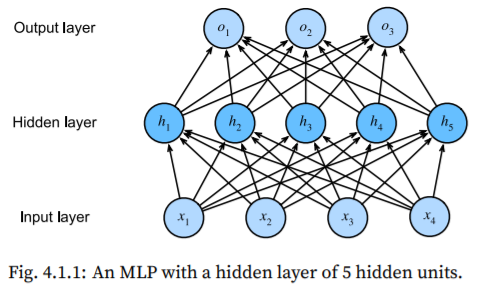

𝐇 = 𝛔(𝐗𝐖^(1)+𝒃^(1)),

𝐎 = 𝐇𝐖^(2)+𝒃^(2).

where 𝛔(.) *activations*
activation functions decide whether a nueron should be activated or not by calculating the weigted sum and further adding bias with it.

1) ReLU function : retains only positive elements and discards all negative elements by setting the corresponding activations to 0.

$$ ReLU(𝓍)=max(𝓍,0).$$

The reason for using ReLU is that its derivatives are particularly well behaved : it mitigated the well-documented problem of vanishing gradients

*parameterized* ReLU(*pReLU*)

$$pReLU(𝓍)=max(0,𝓍)+ 𝛂min(0,𝓍) $$


2) Sigmoid function

(-inf, inf) to (0, 1)

$$ sigmoid(𝓍) = \frac{1}{1+exp(-𝓍)}. $$

The derivative of the sigmoid function:

$$ \frac{𝑑}{𝑑𝓍}sigmoid(𝓍)=\frac{exp(-𝓍)}{(1+exp(-𝓍))^2}=sigmoid(𝓍)(1-sigmoid(𝓍)).   $$

3) Tanh function

(-inf, inf) to (-1, 1)

$$ tanh(𝓍) = \frac{1-exp(-2𝓍)}{1+exp(-2𝓍)}. $$

the derivative of tanh function is:

$$ \frac{𝑑}{𝑑𝓍}tanh(𝓍)=1-tanh^2(𝓍).$$

In [ ]:
!pip install d2l==0.14.2

In [6]:
%matplotlib inline
import torch
from d2l import torch as d2l

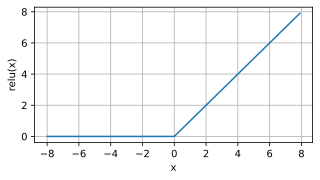

In [3]:
# 1) ReLU
x = torch.arange(-8.0, 8.0, 0.1, requires_grad = True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize = (5, 2.5))
# x.detach()을 사용하면 tensor가 기록을 추적하는 것(메모리를 사용하는것)을 중지할수있다.

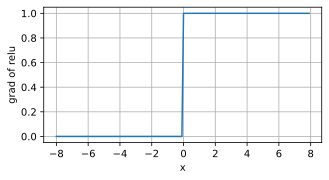

In [4]:
# the derivative of the ReLU function
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize = (5, 2.5))

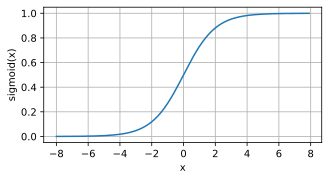

In [5]:
# 2) sigmoid
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize = (5, 2.5))

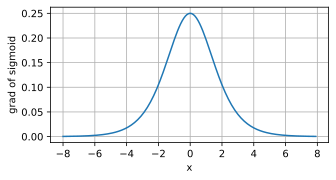

In [10]:
# the derivative of the sigmoid
# clear out previous gradients
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize = (5, 2.5))

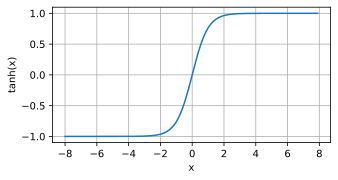

In [11]:
# 3) tanh function
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize = (5, 2.5))

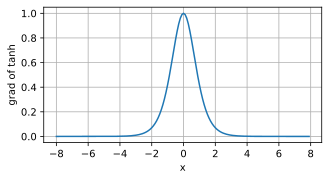

In [12]:
# 3) the derivative of tanh function
# Clear out previous gradients.
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph = True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize = (5, 2.5))

## Summary

we now know how to incorporate nonlinearities to build expressive multilayer neural network architectures.

* MLP adds one or multiple fully-connected hidden layers between the output and input layers and transforms the output of the hidden layer via an activation function.

* Commonly-used activation functions include the ReLU function, the sigmoid function, and the tanh function.

## 4.2 Implementation of Multilayer Perceptrons from scratch

* initializing model parameters

* activation functions

* model

* loss function

* training


Fashion-MNIST : 10 classes, 28*28 = 784 grid


In [6]:
from torch import nn

In [ ]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [8]:
# initializing model parameters
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad = True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad = True))
W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad = True)*0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad = True))

params = [W1, b1, W2, b2]

In [9]:
# activation function
def relu(X):
  a = torch.zeros_like(X)
  return torch.max(X, a)

In [10]:
# Model
# because we are disregarding spatial structure, we reshape each two-dimensional image into a flat vector of length num_inputs.
def net(X):
  X = X.reshape((-1, num_inputs))
  H = relu(X@W1 + b1) # Here '@' stands for matrix multiplication
  return (H@W2 + b2)

In [11]:
# loss function using High-level API
loss = nn.CrossEntropyLoss(reduction='none')

In [ ]:
# Training
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr = lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

In [ ]:
d2l.predict_ch3(net, test_iter)

## Summary
* We saw that implementing a simple MLP is easy, even when done manually.

* However, with a large number of layers, implementing MLPs from scratch can still get messy (e.g., naming and keeping track of our model's parameters)

## 4.3 Concise Implementation of Multilayer Preceptrons

In [17]:
# model
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 256), nn.ReLU(), nn.Linear(256, 10))
def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight, std = 0.01)

net.apply(init_weights);

In [18]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction = 'none')
trainer = torch.optim.SGD(net.parameters(), lr = lr)

In [ ]:
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## Summary
* Using high-level APIs, we can implement MLPs much more concisely.

* For the same classification problem, the implementation of an MLP is the same as that of softmax regression except for additional hidden layers with activation functions.

## 4.4 Model Selection, Underfitting, and Overfitting

The phenomenon of fitting our training data more closely than we fit the underlying distribution is called *overfitting*, and the techniques used to combat overfitting are called *regularization*.

we assume that both the training data and the test data are drawn *independently* from *identical* distributions. This is commonly called the *i.i.d. assumption.* In other words, the second example drawn and the third drawn are no more correlated than the second and the two-millionth sample drawn.

Spliting data three ways, training/test/validation set for model selection

Whether we overfit or underfit can depend both on the complexity of our model and the size of the available training datasets, two topics that we discuss below.

For many tasks, deep learning only outperforms linear models when many thousands of training examples are available.

In [13]:
import math
import numpy as np
import torch
from torch import nn

In [2]:
max_degree = 20 # Maximum degree of the polynomial
n_train, n_test = 100, 100 # training and test dataset sizes
true_w = np.zeros(max_degree) # allocate lots of empty space
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

In [3]:
features = np.random.normal(size = (n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
  poly_features[:, i] /= math.gamma(i + 1) # `gamma(n)` = (n-1)!
# shape of `labels`: (`n_train` + `n_test`,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale = 0.1, size = labels.shape)

In [8]:
# Convert from Numpy ndarrays to tensors
true_w, features, poly_features, labels = [torch.tensor(x, dtype = torch.float32) for x in [true_w, features, poly_features, labels]]

In [9]:
features[:2], poly_features[:2, :], labels[:2]

(tensor([[-0.0326],
         [ 0.8995]]),
 tensor([[ 1.0000e+00, -3.2599e-02,  5.3136e-04, -5.7740e-06,  4.7057e-08,
          -3.0680e-10,  1.6669e-12, -7.7629e-15,  3.1633e-17, -1.1458e-19,
           3.7352e-22, -1.1070e-24,  3.0072e-27, -7.5409e-30,  1.7559e-32,
          -3.8161e-35,  7.7752e-38, -1.4910e-40,  2.7045e-43, -0.0000e+00],
         [ 1.0000e+00,  8.9952e-01,  4.0456e-01,  1.2130e-01,  2.7279e-02,
           4.9075e-03,  7.3573e-04,  9.4543e-05,  1.0630e-05,  1.0625e-06,
           9.5570e-08,  7.8152e-09,  5.8582e-10,  4.0535e-11,  2.6044e-12,
           1.5618e-13,  8.7804e-15,  4.6460e-16,  2.3217e-17,  1.0992e-18]]),
 tensor([4.8964, 5.4448]))

In [10]:
def evaluate_loss(net, data_iter, loss):
  """Evaluate the loss of a model on the given dataset."""
  metric = d2l.Accumulator(2) # Sum of losses, no. of examples
  for X, y in data_iter:
    out = net(X)
    y = y.reshape(out.shape)
    l = loss(out, y)
    metric.add(l.sum(), l.numel())
  return metric[0] / metric[1]

In [11]:
def train(train_features, test_features, train_labels, test_labels, num_epochs = 400):
  loss = nn.MSELoss(reduction = 'none')
  input_shape = train_features.shape[-1]
  # Switch off the bias since we already catered for it in the polynomial features
  net = nn.Sequential(nn.Linear(input_shape, 1, bias = False))
  batch_size = min(10, train_labels.shape[0])
  train_iter = d2l.load_array((train_features, train_labels.reshape(-1, 1)), batch_size)
  test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)), batch_size, is_train=False)
  trainer = torch.optim.SGD(net.parameters(), lr = 0.01)
  animator = d2l.Animator(xlabel = 'epoch', ylabel = 'loss', yscale = 'log', xlim=[1, num_epochs], ylim = [1e-3, 1e2], legend = ['train', 'test'])
  for epoch in range(num_epochs):
    d2l.train_epoch_ch3(net, train_iter, loss, trainer)
    if epoch==0 or (epoch+1) % 20 == 0:
      animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss), evaluate_loss(net, test_iter, loss)))
  print('weight:', net[0].weight.data.numpy())

In [ ]:
# Pick the first four dimensions, i.e., 1, x, x^2/2!, x^3/3! from the polynomial features
train(poly_features[:n_train, :4], poly_features[n_train:, :4], labels[:n_train], labels[n_train:])

In [ ]:
# Pick all the dimensions from the polynomial features
train(poly_features[:n_train, :], poly_features[n_train:, :], labels[:n_train], labels[n_train:], num_epochs = 1500)

## Summary
* Since the generalization error cannot be estimated based on the training error, simply minimizing the training error will not necessarily mean a reduction in the generalization error. Machine learning models need to be careful to safeguard against overfitting so as to minimize the generaliztion error.

* A validation set can be used for model selection, provided that it is not used too liberally.

* Underfitting means that a model is not able to reduce the training error. When training error is much lower than validation error, there is overfitting.

* We should choose an appropriately complex model and avoid using insufficient training samples

## 4.5 Weight decay

*Weight decay *(commonly called L2 regularization), might be the most widely-used technique for regularizing parametric machine learning models.

* To penalize the size of the weight vector, we must somehow add ||𝐰||^2 to the loss function, but how should the model trade off the standard loss for this new additive penalty?

$$ 𝐿(𝐰,𝐛) + \frac{𝜆}{2}||𝐰||^2, $$ 

By contrast, 𝐿1 penalties lead to models that concentrate weights on a small set of features by clearing the other weights to zero. This is called *feature selection*, which may be desirable for other reasons.

the minibatch stochastic gradient descent updates for L2 regularized regression follows:

$$𝐰 ← (1- 𝜂𝜆)𝐰 - \frac{𝜂}{|𝞑|}𝚺_{i∈𝞑}x^{(i)}(𝐰^T𝐱^{(i)}+b-y^{(i)}). $$ 

In [18]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [19]:
def init_params():
  w = torch.normal(0, 1, size = (num_inputs, 1), requires_grad = True)
  b = torch.zeros(1, requires_grad = True)
  return [w, b]

In [20]:
def l2_penalty(w):
  return torch.sum(w.pow(2))/2

In [22]:
def train(lambd):
  w, b = init_params()
  net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
  num_epochs, lr = 100, 0.003
  animator = d2l.Animator(xlabel = 'epochs', ylabel='loss', yscale='log', xlim=[5, num_epochs], legend = ['train', 'test'])
  for epoch in range(num_epochs):
    for X, y in train_iter:
      # The L2 norm penalty term has been added, and broadcasting makes `l2_penalty(w)` a vector whose length is `batch_size`
      l = loss(net(X), y) + lambd * l2_penalty(w)
      l.sum().backward()
      d2l.sgd([w, b], lr, batch_size)
    if (epoch+1) % 5 == 0:
      animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                               d2l.evaluate_loss(net, test_iter, loss)))
  print('L2 norm of w:', torch.norm(w).item())

L2 norm of w: 13.631885528564453


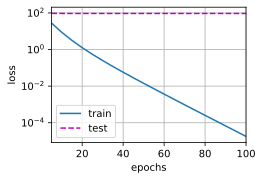

In [23]:
train(lambd=0)

L2 norm of w: 0.3734838664531708


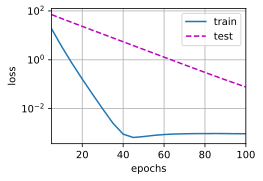

In [24]:
train(lambd=3)

In [26]:
def train_concise(wd):
  net = nn.Sequential(nn.Linear(num_inputs, 1))
  for param in net.parameters():
    param.data.normal_()
  loss = nn.MSELoss(reduction = 'none')
  num_epochs, lr = 100, 0.003
  # The bias parameter has not decayed
  trainer = torch.optim.SGD([
                             {"params":net[0].weight, 'weight_decay':wd},
                             {"params":net[0].bias}], lr = lr)
  animator = d2l.Animator(xlabel = 'epochs', ylabel='loss', yscale = 'log', xlim = [5, num_epochs], legend = ['train', 'test'])
  for epoch in range(num_epochs):
    for X, y in train_iter:
      trainer.zero_grad()
      l = loss(net(X), y)
      l.mean().backward()
      trainer.step()
    if (epoch+1) % 5 == 0:
      animator.add(epoch+1, (d2l.evaluate_loss(net, train_iter, loss), d2l.evaluate_loss(net, test_iter, loss)))
  print('L2 norm of w:', net[0].weight.norm().item())


L2 norm of w: 12.5243558883667


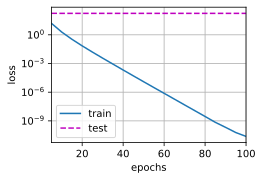

In [27]:
train_concise(0)

L2 norm of w: 0.3780704736709595


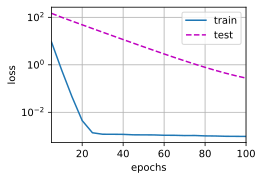

In [28]:
train_concise(3)

## Summary
* Regularization is a common method for dealing with overfitting. It adds a penalty term to the loss function on the training set to reduce the complexity of the learned model.

* One particular choice for keeping the model simple is weight decay using an L2 penalty. This leads to weight decay in the update steps of the learning algorithms.

* The weight decay functionality is provided in optimizers from deep learning frameworks.

* Different sets of parameters can have different update behaviors within the same training loop.